In [43]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [44]:
df=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')

In [45]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [46]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Sex']=enc.fit_transform(df['Sex'])
df.head(2)

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833


In [47]:
survived=df.Survived

In [48]:
df=df.drop(['Survived'],axis='columns')

In [49]:
df.head(2)

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df,survived,train_size=0.8)


In [51]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=200)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=200)

In [52]:
model.score(X_test,y_test)

0.7374301675977654

Text(95.72222222222221, 0.5, 'Truth')

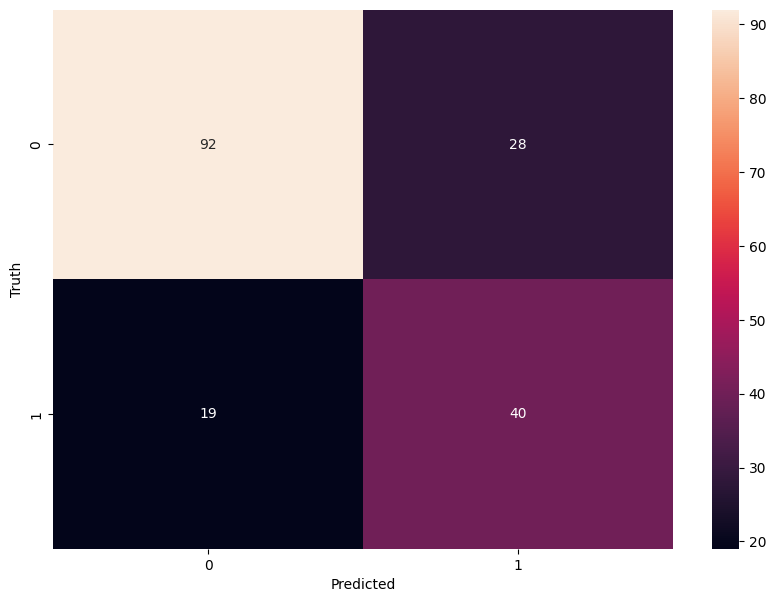

In [53]:
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')